In [1]:
from pickle import dump,load
from pickle import Unpickler
import cv2
import os
import sys
import matplotlib.pyplot as plt
os.sys.path.append("C:/Users/LeeWonSeok/Desktop/pose_fun") # import 할 py 파일 위치
import numpy as np
import pose_fun as pf
from math import sqrt
import img_rec as ir

In [2]:
path = "C:/Users/LeeWonSeok/Desktop/pose_xy" # 좌표저장된 디렉토리
path_png = "C:/Users/LeeWonSeok/Desktop/pose_test" #사진만 저장된 디렉토리

In [3]:
list_pkl = [x for x in os.listdir(path) ] # pkl 리스트 추출
list_png = [x for x in os.listdir(path_png)] # png 리스트 추출

In [4]:
img = [] # image 담을 리스트
area = []  # 좌표 e담을 리스트
for i in list_png :
    ima = cv2.imread(os.path.join(path_png,i))
    img.append(ima)
j = 0
while j < len(list_pkl) :
    try :
        f = open(os.path.join(path,list_pkl[j]),"rb")
        ff = Unpickler(f)
        lst = ff.load()
    except EOFError:
        lst = list()
    finally:    
        f.close()
        area.append(lst)
        j += 1

In [ ]:
'''
좌표 순서 기록
0 : 코 
1 : 목
2 : 왼쪽어깨
3 : 왼팔꿈치
4 : 왼손
5 : 오른쪽어깨
6 : 오른쪽팔꿈치
7 : 오른쪽손
8 : 왼골반
9 : 왼무릎
10 : 왼발
11 : 오른골반
12 : 오른무릎
13 : 오른발
14 : 왼눈
15 : 왼귀
16 : 오른눈
17 : 오른귀
코랑 어깨가 반드시 있고
왼어깨랑 오른쪽 어깨 차이가 젤 큰 거를 가져온다
'''

In [5]:
##pose_fun class 실행 pf..
pose = pf.FindPosition(area,img) # area 는 좌표가 담긴 리스트, img는 이미지가 담긴 리스트
per = pose.perfect_case() #기본 값 코 ,양쪽 어깨 있는 case 만 나오도록(한사진에 여려명 인식된경우 대비) 

In [6]:
per_max = pf.dif_posit(per) #양쪽어깨 넓이가 가장 큰 사진만 남도록 사진에서

In [7]:
## 이미지방과 좌표방 파일번호(이름)로 id 부여 
per_len = len(per_max)
per_dict = dict(zip(range(1,per_len+1),per_max))
img_len = len(img)
img_dict = dict(zip(range(1,img_len+1),img))
#per_dict는 해당사진번호와 pose 좌표가 들어간파일
#img_dict는 해당사진번호와 이미지가 들어간 파일

In [8]:
case_perfect,case_else,_ = ir.case_classify(per_dict) 
# 좌표 dict 파일 넣으면 default로 골반이 있는 경우와 없는 경우
#case_perfect : 골반이 하나라도 있는 경우
#case_else : 골반이 아예 안잡힌 경우
# _ : 골반이 아예 없는 것중에 어깨 코 조차 다 안잡힌 애들(버리는 case)

In [13]:
#examples
case_else
# 키 구성 예시 
# (14,0) => id 14 사진의 0번째 사람
# (14,1) => id 14 사진의 1번째 사람
# 예를들어 14번째 이미지와 첫 번째 잡힌 사람의 좌표를 가지고 오고 싶다면
# case_else[(14,0)] => pose좌표
# img_dict[14] => 사진 

{(14, 0): [(116, 97),
  (137, 204),
  (55, 201),
  (31, 350),
  (0, 0),
  (232, 210),
  (238, 294),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (99, 82),
  (137, 78),
  (85, 96),
  (169, 87)],
 (24, 0): [(251, 165),
  (287, 254),
  (187, 242),
  (0, 0),
  (0, 0),
  (400, 270),
  (309, 493),
  (179, 670),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (231, 134),
  (284, 132),
  (0, 0),
  (342, 137)],
 (27, 0): [(240, 163),
  (200, 253),
  (90, 252),
  (0, 0),
  (0, 0),
  (300, 249),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (212, 142),
  (245, 136),
  (153, 145),
  (0, 0)],
 (49, 0): [(209, 167),
  (253, 350),
  (84, 344),
  (42, 569),
  (78, 609),
  (434, 347),
  (476, 640),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (175, 144),
  (243, 138),
  (142, 173),
  (293, 160)],
 (50, 0): [(200, 190),
  (218, 298),
  (101, 281),
  (76, 506),
  (184, 571),
  (335, 307),
  (332, 517),

In [15]:
#예시
print(case_else[(14,0)]) 
print(img_dict[14]) 

[(116, 97), (137, 204), (55, 201), (31, 350), (0, 0), (232, 210), (238, 294), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (99, 82), (137, 78), (85, 96), (169, 87)]
[[[150 157 144]
  [146 155 142]
  [143 151 140]
  ...
  [103 196 251]
  [103 196 251]
  [103 196 251]]

 [[148 157 144]
  [145 154 141]
  [142 150 139]
  ...
  [103 196 251]
  [103 196 251]
  [103 196 251]]

 [[147 156 143]
  [145 154 141]
  [140 150 138]
  ...
  [103 196 251]
  [103 196 251]
  [103 196 251]]

 ...

 [[207 209 219]
  [195 200 203]
  [160 166 161]
  ...
  [ 68  81  65]
  [ 60  73  57]
  [ 48  63  49]]

 [[202 206 207]
  [166 171 169]
  [121 127 116]
  ...
  [ 49  66  53]
  [ 43  60  47]
  [ 37  54  43]]

 [[190 195 193]
  [138 143 134]
  [ 87  94  79]
  ...
  [ 35  55  43]
  [ 32  51  42]
  [ 30  49  40]]]


In [9]:
rec_img_perfect = ir.find_rectangle(img=img_dict,case=case_perfect,metric="perfect")
rec_img_else = ir.find_rectangle(img=img_dict,case=case_else,metric="else")
#image 가 담긴 dict 파일과 좌표가 담긴 dict 파일 필요
#metric = perfect면 골반 있는 case 에
#metric = else 는 골반 안잡힌 케이스에 적용하는거임

In [17]:
# 결과 예시
rec_img_else
# 아까 좌표  key 연결과 동일
# key: (14,0)  
# value: [(0,142),(274,399)]
# img_dict[14][142:399,142:274] 하면 14번째 이미지의 0번째 사람의 사각형 영역을 가져오는 것

{(14, 0): [(0, 142), (274, 399)],
 (24, 0): [(8, 171), (499, 749)],
 (27, 0): [(0, 179), (475, 791)],
 (49, 0): [(0, 228), (499, 750)],
 (50, 0): [(0, 203), (499, 749)],
 (76, 0): [(29, 102), (265, 399)],
 (77, 0): [(109, 71), (148, 399)],
 (80, 0): [(12, 134), (265, 399)],
 (129, 0): [(0, 168), (266, 399)],
 (131, 0): [(0, 194), (499, 750)],
 (204, 0): [(0, 137), (265, 399)],
 (298, 0): [(3, 83), (266, 399)],
 (345, 0): [(46, 172), (213, 399)],
 (348, 0): [(178, 115), (466, 332)],
 (351, 0): [(34, 95), (265, 399)],
 (352, 0): [(0, 214), (499, 750)],
 (376, 0): [(74, 184), (434, 750)],
 (426, 0): [(0, 263), (499, 749)],
 (433, 0): [(9, 166), (491, 749)],
 (439, 0): [(0, 192), (499, 749)],
 (445, 0): [(0, 110), (266, 399)],
 (446, 1): [(0, 188), (253, 749)],
 (462, 0): [(12, 218), (427, 750)],
 (475, 0): [(0, 89), (102, 399)],
 (495, 0): [(0, 204), (499, 749)],
 (504, 0): [(324, 380), (499, 749)],
 (506, 0): [(0, 142), (499, 791)],
 (544, 0): [(0, 96), (231, 399)],
 (554, 0): [(23, 95),

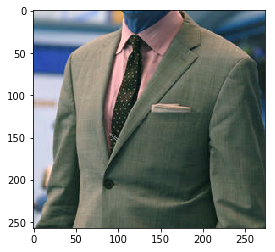

In [69]:
plt.imshow(img_dict[14][142:399,0:274]) # 사각형 짜른거 부른거 예시

In [68]:
#사각형 내보내기
path2 = "C:/Users\LeeWonSeok\Desktop\sdfs"
img_len = len(img)
img2 = [x.copy() for x in img] # 리스트 주소 안같게 복사하는 방법
img_dict2 = dict(zip(range(1,img_len+1),img2))
ir.show_rectengle(img_dict2,rec_img_else,path2)
#img dict 파일과 사각형 영역 dict 파일과 출력 위치 지정하면 사진 볼수있음 

# Skin Remove 는 일단 생략

# 원하는 부위 다있는 경우 출력하는 함수 적용

In [19]:
# 사용 예시 
want_list = [3,4] # 왼 팔꿈치와 왼손 이 다있는 걸 뽑자!

In [20]:
want = ir.select_case(want_list=want_list,case=case_perfect,metric="and") #metric은 default "and"임
# any 넣으면 왼 팔꿈치와 왼손 중에 하나라도 있으면 뽑음
# want 안에는 왼팔꿈치가 다있는 key 와 좌표만 있음

In [25]:
want
# key(사진번호, 사람 번호)
# value 좌표 인덱스

{(1191, 0): [(120, 75),
  (123, 115),
  (93, 115),
  (85, 167),
  (80, 215),
  (152, 113),
  (156, 164),
  (159, 215),
  (102, 205),
  (101, 283),
  (101, 340),
  (139, 205),
  (140, 281),
  (142, 350),
  (113, 70),
  (125, 69),
  (106, 75),
  (134, 70)],
 (597, 0): [(144, 86),
  (143, 116),
  (117, 115),
  (100, 161),
  (119, 189),
  (170, 116),
  (181, 162),
  (172, 190),
  (126, 214),
  (126, 290),
  (128, 355),
  (162, 211),
  (162, 283),
  (169, 353),
  (137, 80),
  (151, 80),
  (129, 81),
  (158, 81)],
 (771, 0): [(141, 107),
  (128, 140),
  (100, 133),
  (80, 182),
  (80, 223),
  (153, 145),
  (155, 194),
  (154, 235),
  (105, 225),
  (110, 299),
  (115, 364),
  (137, 228),
  (125, 300),
  (113, 360),
  (136, 100),
  (147, 104),
  (125, 100),
  (153, 106)],
 (177, 0): [(137, 50),
  (136, 90),
  (99, 91),
  (92, 150),
  (88, 212),
  (174, 87),
  (191, 145),
  (187, 186),
  (116, 203),
  (122, 286),
  (122, 355),
  (154, 204),
  (150, 284),
  (147, 347),
  (129, 43),
  (142, 41),


In [30]:
want2 = ir.select_case(want_list=[6,7],case=want,metric="any") #want 중에서 6,7번 중하나라도 있는 경우 추출

In [31]:
len(want2)

1674